# ABOUT LUNG CANCER

Lung cancer, also known as lung carcinoma, is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung. This growth can spread beyond the lung by the process of metastasis into nearby tissue or other parts of the body.



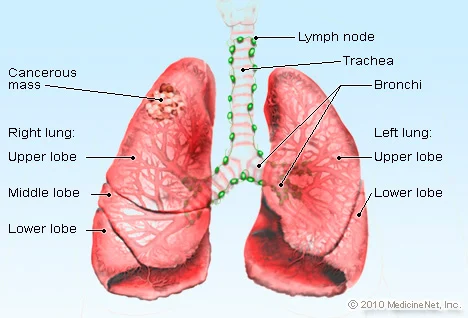

In this study, we tried to predict Lung Cancer using 5 different algorithm:

Logistic regression classification      
SVM (Support Vector Machine) classification     
Decision tree classification     
Random forest classification     
K-Nearest Neighbor classification

# ABOUT DATASET


The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system

Total no. of attributes:16
No .of instances:284
Attribute information:

1. Gender: M(male), F(female)
2. Age: Age of the patient
3. Smoking: YES=2 , NO=1.
4. Yellow fingers: YES=2 , NO=1.
5. Anxiety: YES=2 , NO=1.
6. Peer_pressure: YES=2 , NO=1.
7. Chronic Disease: YES=2 , NO=1.
8. Fatigue: YES=2 , NO=1.
9. Allergy: YES=2 , NO=1.
10. Wheezing: YES=2 , NO=1.
11. Alcohol: YES=2 , NO=1.
12. Coughing: YES=2 , NO=1.
13. Shortness of Breath: YES=2 , NO=1.
14. Swallowing Difficulty: YES=2 , NO=1.
15. Chest pain: YES=2 , NO=1.
16. Lung Cancer: YES , NO.



# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
data=pd.read_csv('lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
data.shape

(309, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
cat_cols=["GENDER","LUNG_CANCER"]
cat_cols

['GENDER', 'LUNG_CANCER']

In [8]:
act_df=pd.get_dummies(data[cat_cols],drop_first=True)
act_df

,GENDER_M,LUNG_CANCER_YES
0,1,1
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
304,0,1
305,1,1
306,1,1
307,1,1


In [9]:
data.drop(data[cat_cols],axis=1,inplace=True)
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [10]:
new_df=pd.concat([act_df,data],axis=1)
new_df.head()

,GENDER_M,LUNG_CANCER_YES,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [11]:
new_df.shape

(309, 16)

In [12]:
cols=new_df.columns.tolist()
cols

['GENDER_M',
 'LUNG_CANCER_YES',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [13]:
new_df.corr()

,GENDER_M,LUNG_CANCER_YES,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
GENDER_M,1.000000,0.067254,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958
LUNG_CANCER_YES,0.067254,1.000000,0.089465,0.058179,0.181339,0.144947,0.186388,0.110891,0.150673,0.327766,0.249300,0.288533,0.248570,0.060738,0.259730,0.190451
AGE,0.021306,0.089465,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,0.036277,0.058179,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,-0.212959,0.181339,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,-0.152127,0.144947,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,-0.275564,0.186388,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.204606,0.110891,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,-0.083560,0.150673,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.154251,0.327766,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433


In [14]:
new_df['LUNG_CANCER_YES'].value_counts()

1    270
0     39
Name: LUNG_CANCER_YES, dtype: int64

VISUALING OF DATA

C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LUNG_CANCER_YES', ylabel='count'>

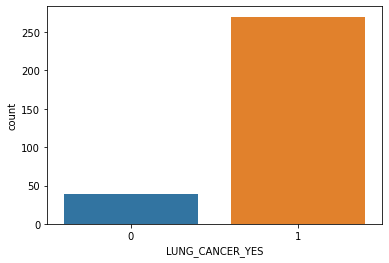

In [15]:
sns.countplot(new_df['LUNG_CANCER_YES'])

C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER_M', ylabel='count'>

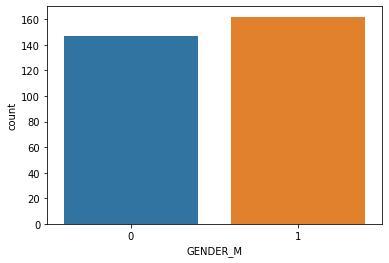

In [16]:
sns.countplot(new_df["GENDER_M"])

C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER_M', ylabel='count'>

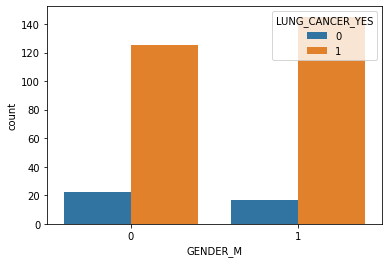

In [17]:
sns.countplot(new_df["GENDER_M"],hue=new_df["LUNG_CANCER_YES"])

C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SMOKING', ylabel='count'>

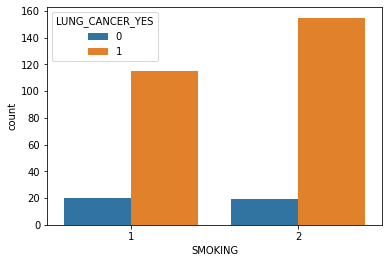

In [18]:
sns.countplot(new_df["SMOKING"],hue=new_df["LUNG_CANCER_YES"])

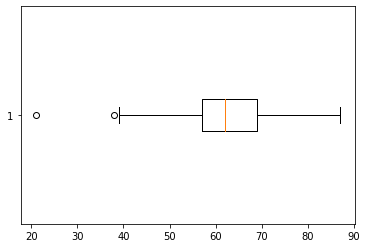

In [19]:
plt.boxplot(new_df['AGE'],vert=False)
plt.show()

# splitting data

In [20]:
x=new_df.drop('LUNG_CANCER_YES',axis=1)
y=new_df["LUNG_CANCER_YES"]

In [21]:
x

,GENDER_M,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [22]:
x.head()

,GENDER_M,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [23]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER_YES, Length: 309, dtype: uint8

In [24]:
print(y.shape)
print(type(y))


(309,)
<class 'pandas.core.series.Series'>


# Training and Testing 

Data for training and testing
To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 10%, assumed it ideal ratio between training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
x_train.shape

(231, 15)

In [27]:
y_train.shape

(231,)

# Logistic regression

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input  (X)  belongs to the default class  (Y=1) )  (P(X)=P(Y=1|X)) . In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [28]:
from sklearn.linear_model import LogisticRegression
lr_reg=LogisticRegression()

In [29]:
lr_reg.fit(x_train,y_train)

C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred=lr_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=uint8)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[ 3,  2],
       [ 1, 72]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.9615384615384616

In [33]:
# ## Saving model to disk
import pickle
pickle.dump(lr_reg, open('E:\\ZZZ_Students_projects\\Ishu_Shruti_LNCT\\lung_final\\model_lung.pkl','wb'))

In [34]:
# Loading model to compare the results
model = pickle.load(open('E:\\ZZZ_Students_projects\\Ishu_Shruti_LNCT\\lung_final\\model_lung.pkl','rb'))
print(model.predict([[69,1,2,2,1,1,2,1,2,2,2,2,2,2,1]]))


[0]


C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
model = pickle.load(open('E:\\ZZZ_Students_projects\\Ishu_Shruti_LNCT\\lung_final\\model_lung.pkl','rb'))
print(model.predict([[69,1,1,1,1,1,1,1,1,1,1,1,1,2,1]]))



[0]


C:\Users\MADHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
